<a href="https://colab.research.google.com/github/Yoon2596/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EA%B3%BC%EC%A0%9C/ML_%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EB%AC%B8%EC%A0%9C(%EB%A5%98%EC%9C%A4%EC%84%A0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pipeline 연습

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 데이터 로딩
data = load_breast_cancer()
X, y = data.data, data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인 구성
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=2)),
    ('lr', LogisticRegression(max_iter=1000))
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'svd__n_components': [2, 5, 10],
    'lr__C': [0.1, 1, 10]
}

# GridSearchCV를 사용한 하이퍼 파라미터 튜닝
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")


# 평가 사용자 함수 정의
def evaluate_model(model, X_test, y_test):
    # 예측 수행
    y_pred = model.predict(X_test)
    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    # 분류 보고서 생성
    report = classification_report(y_test, y_pred)
    # ROC AUC 계산
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    # 결과 출력
    print(f"Test Accuracy: {accuracy:.4f}\n")
    print(f"Classification Report:\n{report}\n")
    print(f"ROC AUC: {roc_auc:.4f}")

# 최적의 모델로 평가
evaluate_model(grid_search, X_test, y_test)

Best parameters found: {'lr__C': 1, 'svd__n_components': 10}
Test Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


ROC AUC: 0.9813


California_housing 데이터셋으로 아래사항을 참조하여 주택가격을 예측하는 회귀모델을 개발하세요.
- 전체 회귀모델을 적용
- 각 모델별 최적 하이퍼파라미터 - GridSearchCV 활용
- 평가지수 MSE 기준으로 가장 성능이 좋은 모델과 파라미터를 적용하여 평가 결과를 출력

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# 데이터 로딩
housing = fetch_california_housing()
y = housing.target
X = housing.data

df = pd.DataFrame(X, columns=housing.feature_names)
df["Target"] = y

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


특성(피처)
- MedInc: 블록 그룹의 중간 소득 (단위: $10,000)
- HouseAge: 블록 그룹 내 주택의 중간 연령
- AveRooms: 가구당 평균 방 수
- AveBedrms: 가구당 평균 침실 수
- Population: 블록 그룹 내 인구 수
- AveOccup: 가구당 평균 인원 수
- Latitude: 블록 그룹의 위도
- Longitude: 블록 그룹의 경도

타겟 변수
- MedHouseVal: 블록 그룹의 중간 주택 가격 (단위: $100,000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


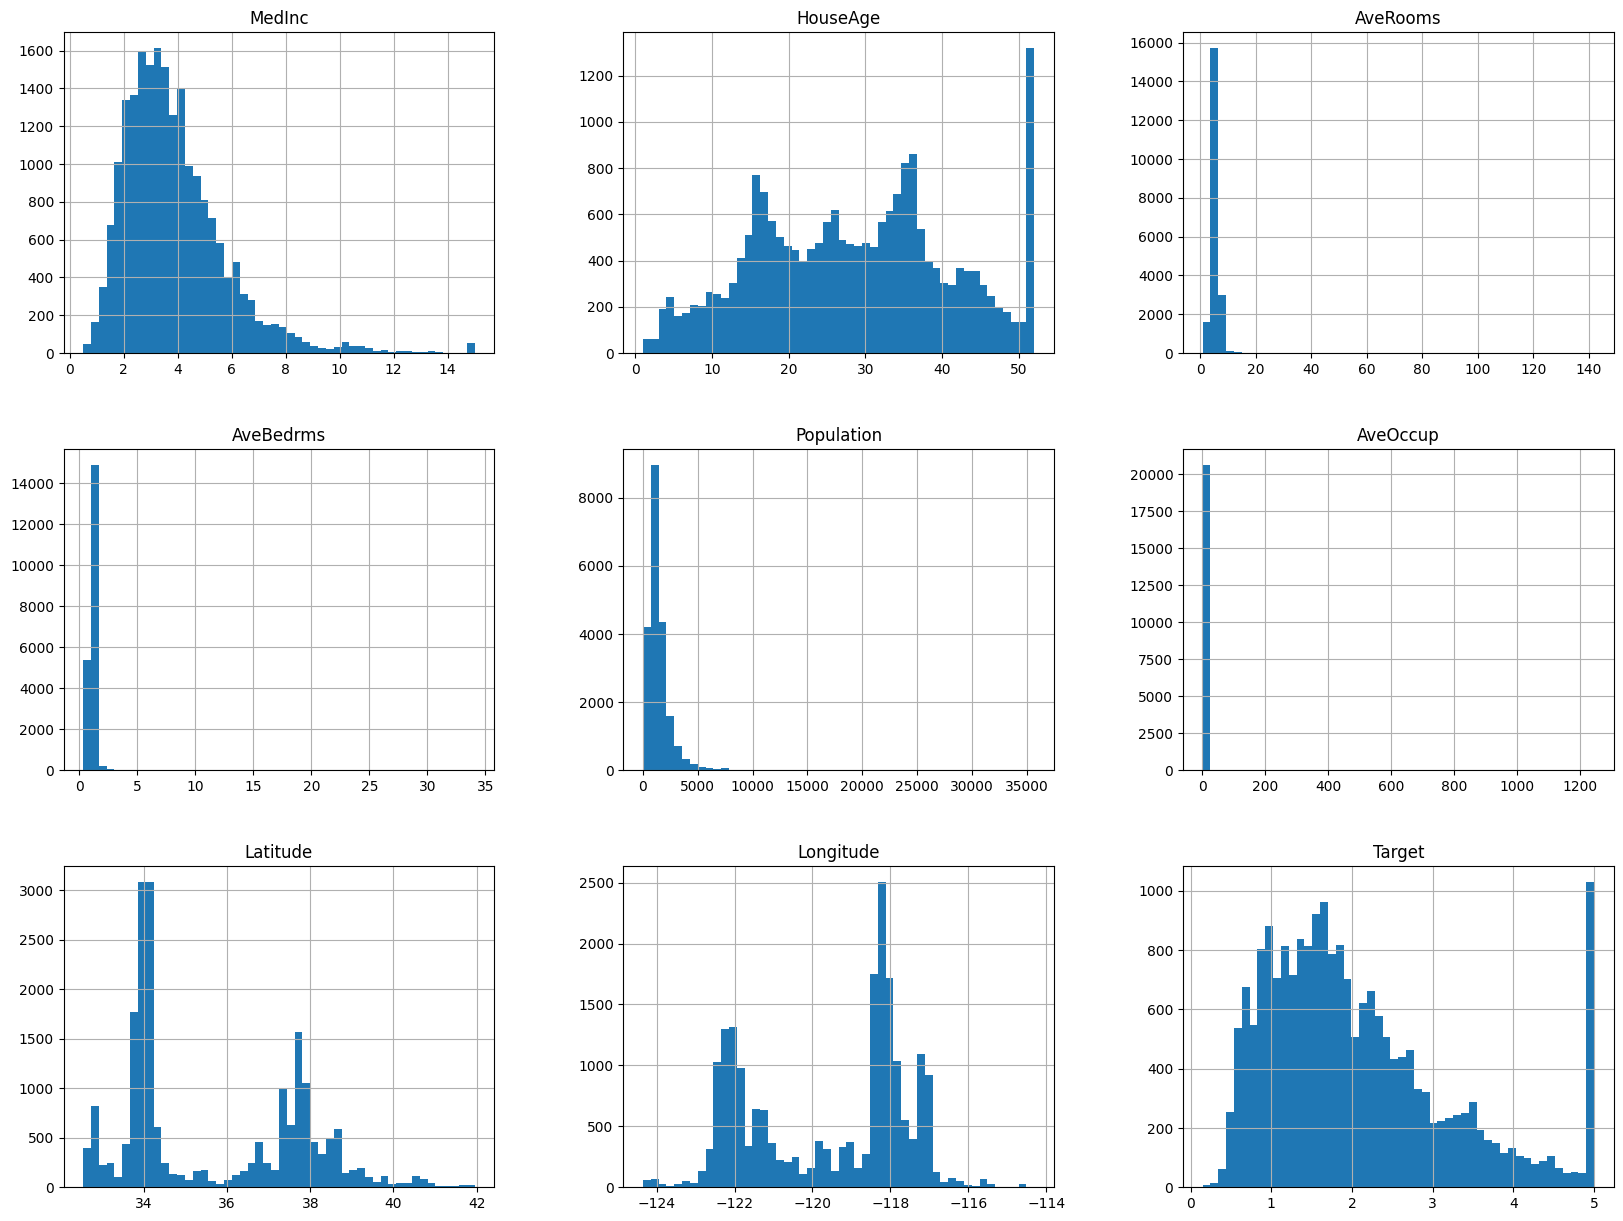

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 히스토그램으로 확인
df.hist(bins=50, figsize=(20,15))
plt.show()

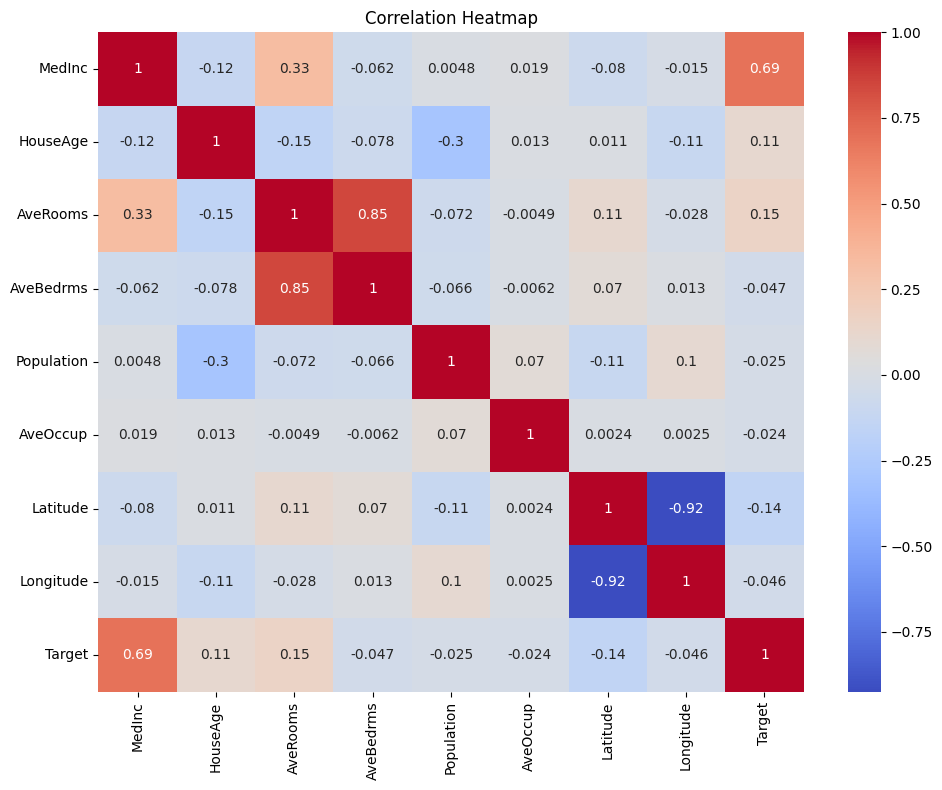

In [ ]:
# target에 대한 히트맵 상관관계
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# 소득 전처리
df['Income_cat'] = pd.cut(df['MedInc'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
df.drop('MedInc', axis=1, inplace=True)
df.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,Income_cat
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,5
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,5
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,5
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3


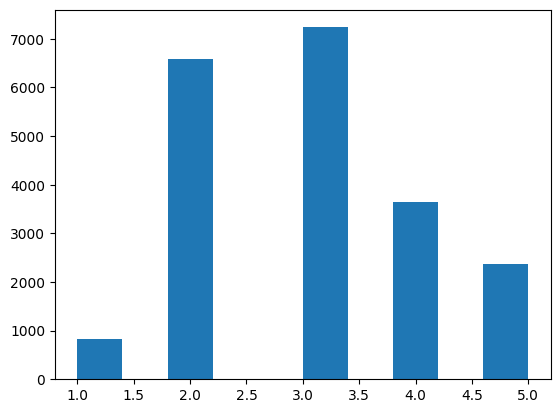

,count
Income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


In [ ]:
plt.hist(df['Income_cat'])
plt.show()
df['Income_cat'].value_counts()

In [ ]:
# 상관관계가 0.1 미만이 데이터 제거
df.drop(['AveBedrms', 'Population', 'AveOccup'], axis=1, inplace=True)
df.head()

,HouseAge,AveRooms,Latitude,Longitude,Target,Income_cat
0,41.0,6.984127,37.88,-122.23,4.526,5
1,21.0,6.238137,37.86,-122.22,3.585,5
2,52.0,8.288136,37.85,-122.24,3.521,5
3,52.0,5.817352,37.85,-122.25,3.413,4
4,52.0,6.281853,37.85,-122.25,3.422,3


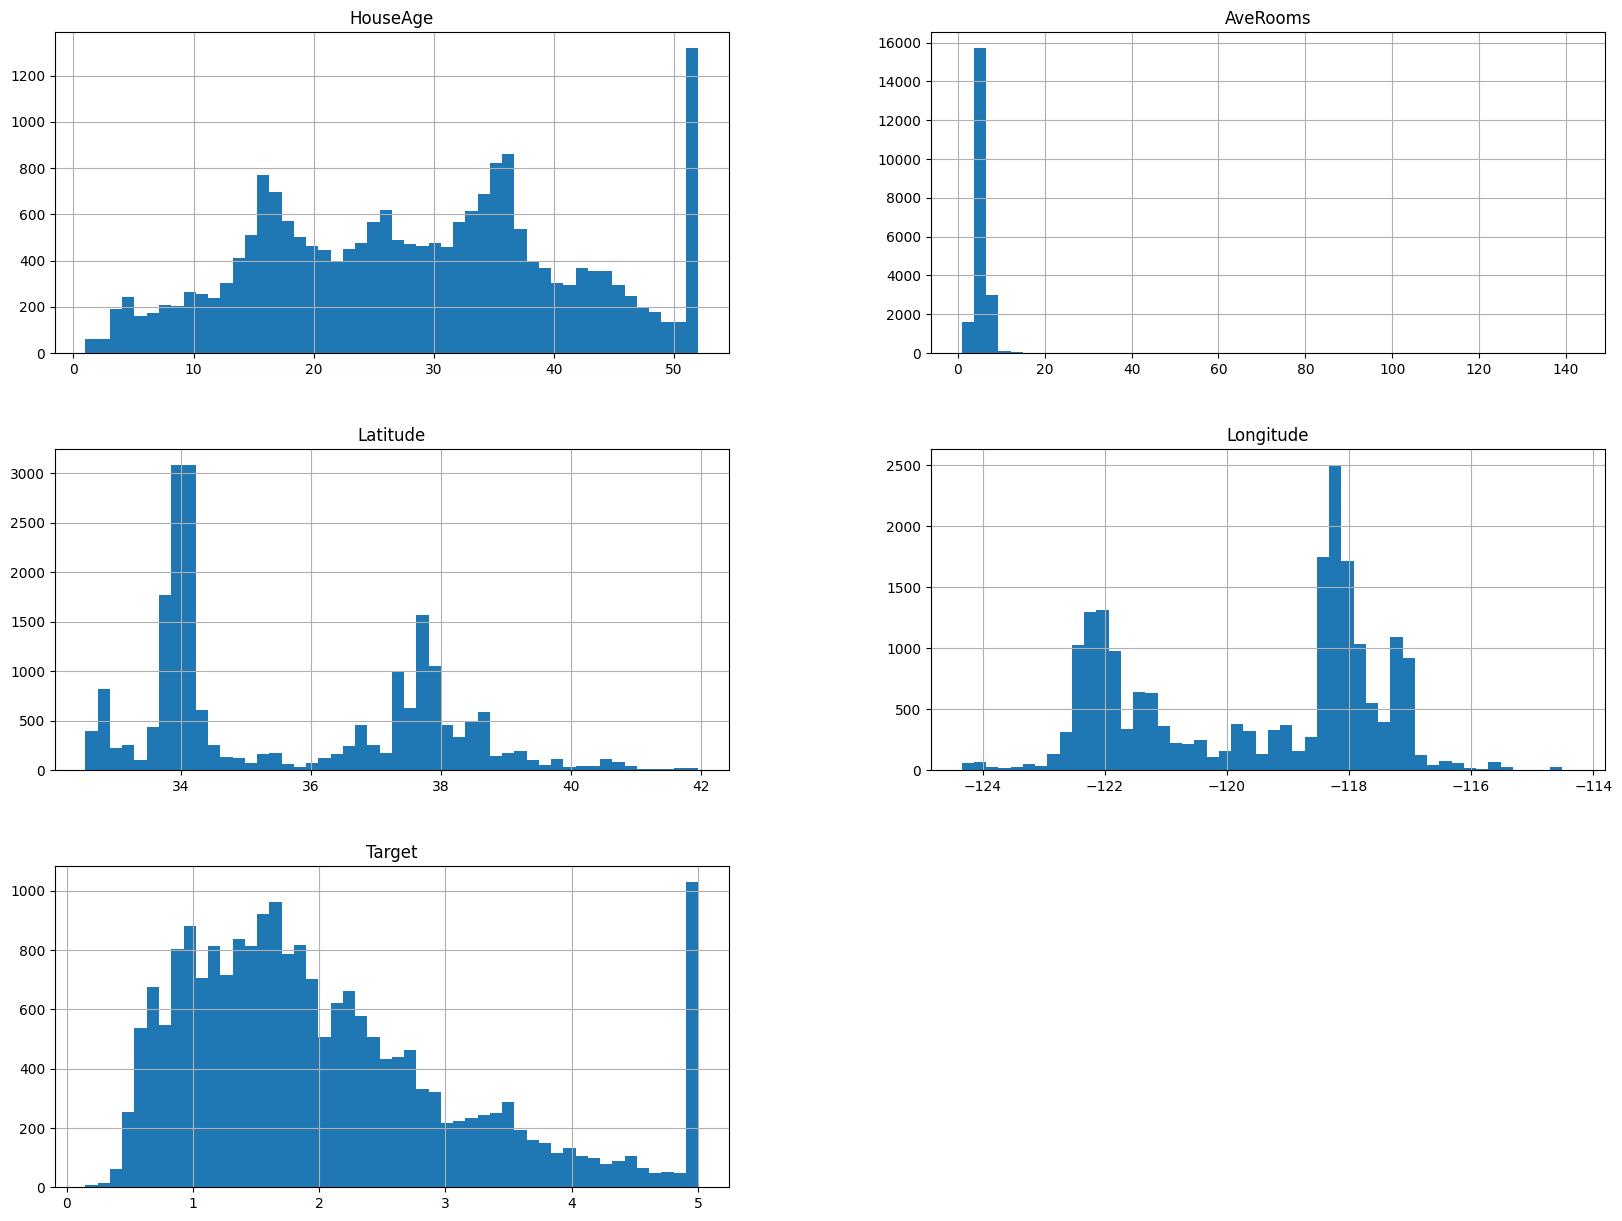

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

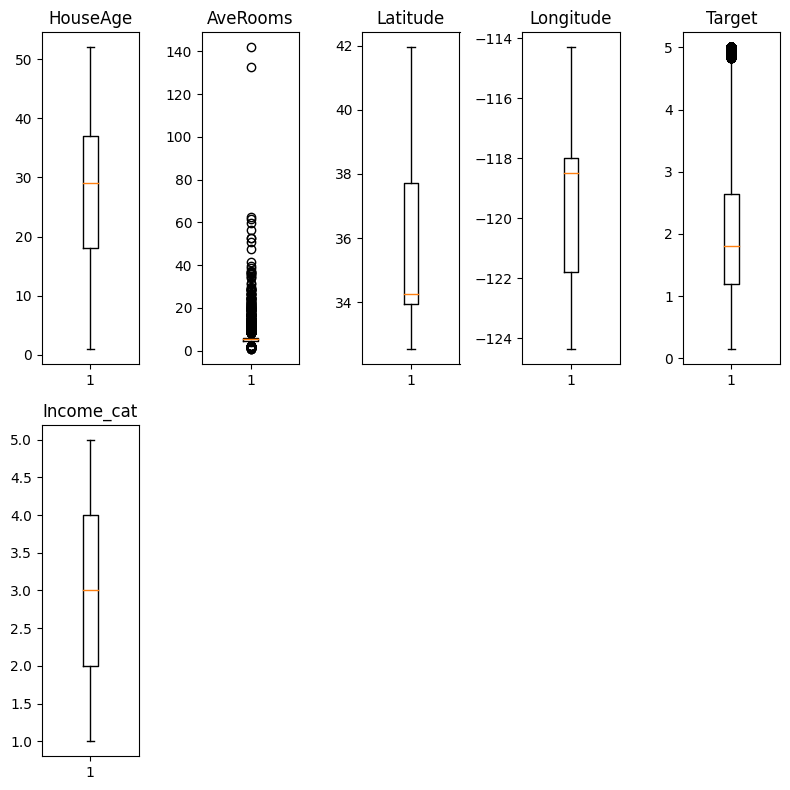

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(8, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 5, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# IQR 방법을 사용한 이상치 처리 함수 정의
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'AveRooms')

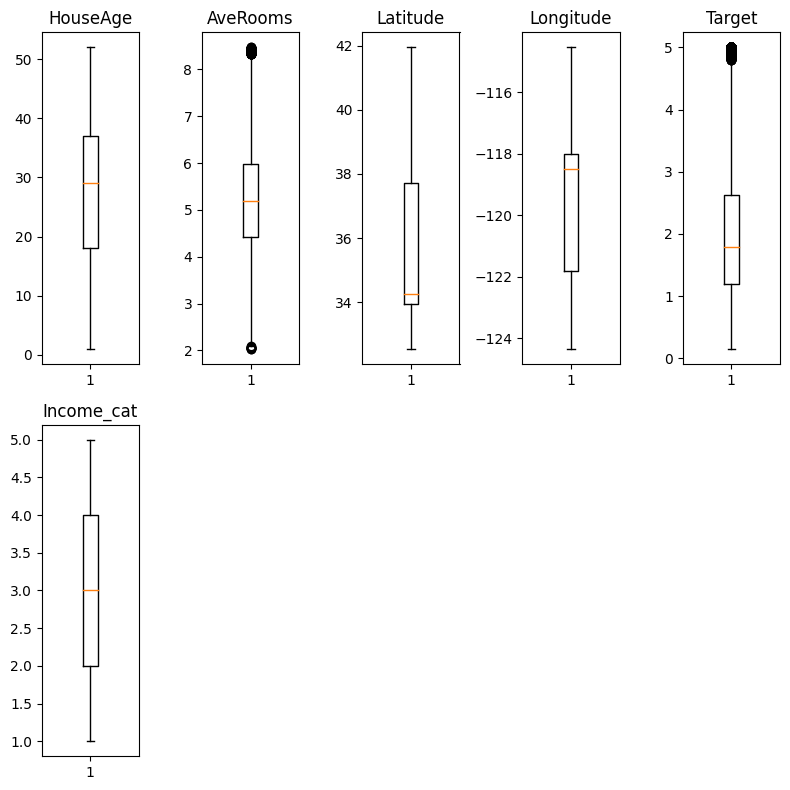

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(8, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 5, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

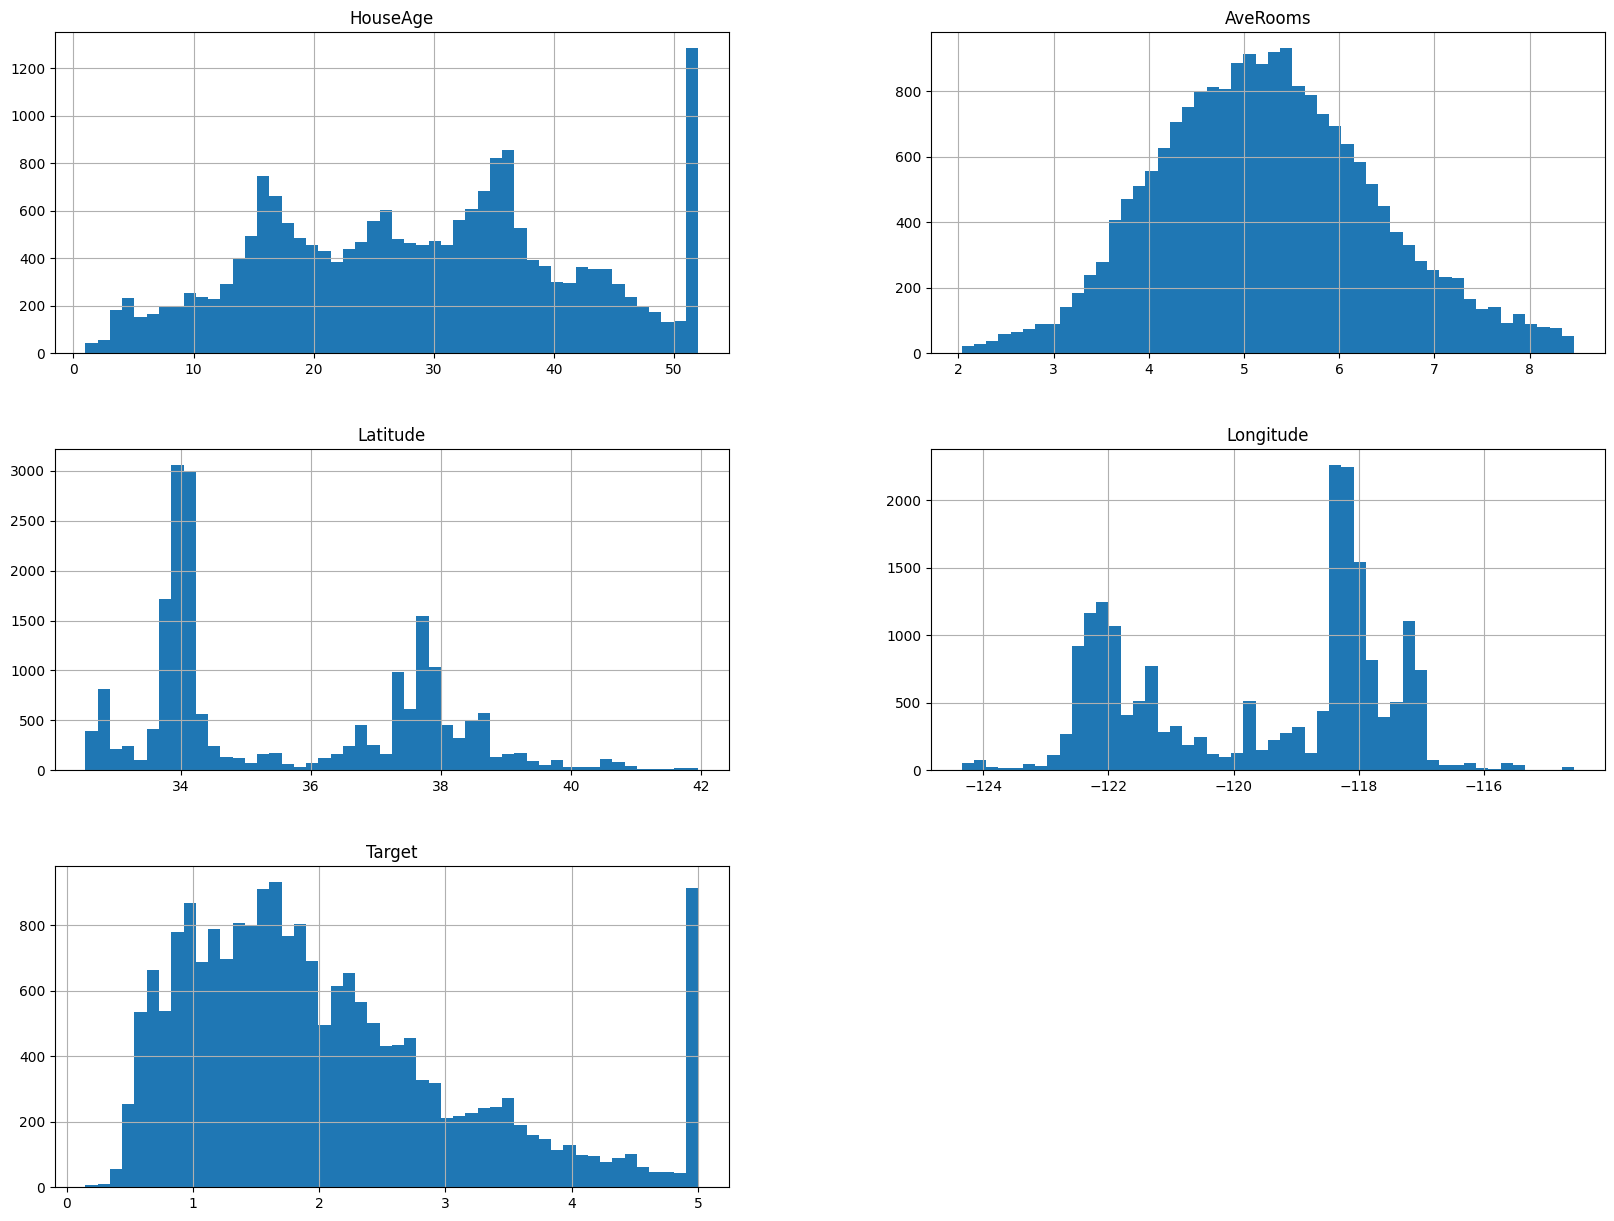

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20129 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   HouseAge    20129 non-null  float64 
 1   AveRooms    20129 non-null  float64 
 2   Latitude    20129 non-null  float64 
 3   Longitude   20129 non-null  float64 
 4   Target      20129 non-null  float64 
 5   Income_cat  20129 non-null  category
dtypes: category(1), float64(5)
memory usage: 963.4 KB


In [ ]:
# income_cat에 one_hot_encoding
df = pd.get_dummies(df, columns=['Income_cat'])
df.head()

,HouseAge,AveRooms,Latitude,Longitude,Target,Income_cat_1,Income_cat_2,Income_cat_3,Income_cat_4,Income_cat_5
0,41.0,6.984127,37.88,-122.23,4.526,False,False,False,False,True
1,21.0,6.238137,37.86,-122.22,3.585,False,False,False,False,True
2,52.0,8.288136,37.85,-122.24,3.521,False,False,False,False,True
3,52.0,5.817352,37.85,-122.25,3.413,False,False,False,True,False
4,52.0,6.281853,37.85,-122.25,3.422,False,False,True,False,False


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor as XGBoost
from lightgbm import LGBMRegressor as LGBM
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 데이터 로딩
X = df.drop('Target', axis=1)
y = df['Target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일러 생성
scaler = StandardScaler()

# 모델과 파라미터 그리드 설정
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(random_state=42),
        'params': {
            'model__alpha': [0.1, 1, 10, 100]
        }
    },
    'Lasso': {
        'model': Lasso(random_state=42),
        'params': {
            'model__alpha': [0.1, 1, 10, 100]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(random_state=42),
        'params': {
            'model__alpha': [0.1, 1, 10, 100],
            'model__l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20],
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 500],
            'model__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'XGBoost': {
        'model': XGBoost(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
        }
    },

    'LightGBM': {
        'model': LGBM(force_row_wise=True, random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 500],
            'model__learning_rate': [0.01, 0.1, 0.2]
        }
    },
}

# 최적의 모델과 파라미터를 찾기 위한 변수 초기화
best_model = None
best_params = None
best_score = float('inf')
best_name = None
best_mse = float('inf')


# 각 모델에 대해 GridSearchCV 수행
for name, model_info in models.items():
    pipe = Pipeline([
        ('scaler', scaler),
        ('model', model_info['model'])
    ])

    grid_search = GridSearchCV(pipe, model_info['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # 평가
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # 결과 출력
    print(f'Model "{name}" params: {grid_search.best_params_} score: {grid_search.best_score_}, mse : {mse}')

    # MSE 기준으로 최적의 모델 찾기
    if -grid_search.best_score_ < best_score:  # score는 음수이므로 비교를 위해 양수로 변환
        best_score = -grid_search.best_score_  # 최종 선택을 위한 양수로 변환된 MSE
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        best_name = name
        best_mse = mse  # 최종 선택을 위한 MSE 저장

# 최적의 모델로 평가
# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)

print(f"Best Model: {best_name}")
print(f"Best Parameters: {best_params}")
print(f"Test MSE: {mse:.4f}")


Model "LinearRegression" params: {} score: -0.5637035097825294, mse : 0.5798873354719846
Model "Ridge" params: {'model__alpha': 1} score: -0.5635854083725862, mse : 0.579895559068004
Model "Lasso" params: {'model__alpha': 0.1} score: -0.733156005237662, mse : 0.759670749614692
Model "ElasticNet" params: {'model__alpha': 0.1, 'model__l1_ratio': 0.1} score: -0.6170928082385283, mse : 0.6395602027712485
Model "RandomForestRegressor" params: {'model__max_depth': None, 'model__n_estimators': 200} score: -0.23714367047370272, mse : 0.2313012081021849
Model "GradientBoostingRegressor" params: {'model__learning_rate': 0.2, 'model__n_estimators': 500} score: -0.24145436906386797, mse : 0.2355649601893758
Model "XGBoost" params: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 200} score: -0.22407710470244427, mse : 0.21972521774455678
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 12882, number of used features: 9
[LightGBM]

# 최종 결과
Model "LightGBM" params: {'model__learning_rate': 0.1, 'model__n_estimators': 500} score: -0.21165472434161928, mse : 0.20492960521642273 <br>
Best Model: LightGBM <br>
Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 500} <br>
Test MSE: 0.2049